# What women want, what men want.

In [75]:

%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import math
import collections
#warnings.filterwarnings("ignore")

In [287]:
profiles = pd.read_csv('data/brides18full.csv')
for i in range(19, 52):
    profiles2 = pd.read_csv('data/brides'+str(i)+'full.csv')
    profiles2["type"] = "GroomWanted"
    profiles = profiles.append(profiles2)
    
for i in range(18, 52):
    profiles2 = pd.read_csv('data/grooms'+str(i)+'full.csv')
    profiles2["type"] = "BrideWanted"
    profiles = profiles.append(profiles2)
    

In [238]:
df = pd.DataFrame(profiles)

In [239]:
df.head()

about1  \
0  My self Priyanka, pursuing B.Com 2nd year and ...   
1             Am smart, modern and independent girl.   
2  I am an understanding person with a positive d...   
3  I am an easy going girl and presently studying...   
4  She is simple, straight forward and down to ea...   

                                              about2 about_family      age2  \
0                                                NaN          NaN  21 to 24   
1                                                NaN          NaN  21 to 25   
2                                                NaN          NaN  21 to 24   
3                                                NaN          NaN  21 to 30   
4  He should be simple and respect women. He shou...          NaN  27 to 32   

        birth1    birth2                birth3  birth4    body1 body2  ...  \
0  26 May 1995  04:00:00                 India  Meerut     Slim   NaN  ...   
1  15 Jun 1995       NaN                   NaN     NaN  Average   NaN  ...   
2  14 Nov 1994       NaN  United Arab Emirates     NaN  Average  Slim  ...   
3  12 Dec 1994       NaN                 India   Delhi     Slim   NaN  ...   
4  27 Jul 1995       NaN                   NaN     NaN    Heavy   NaN  ...   

  special2       status1     status2 subcaste url   values1 values2 weight1  \
0      NaN  Middle Class         NaN  Tevatia NaN  Moderate     NaN     NaN   
1      NaN           NaN         NaN      NaN NaN       NaN     NaN     NaN   
2     None  Middle Class  High Class      NaN NaN    Modern  Modern  55 Kgs   
3      NaN  Middle Class         NaN      NaN NaN   Liberal     NaN     NaN   
4      NaN           NaN         NaN      NaN NaN       NaN     NaN     NaN   

          weight2 type  
0             NaN  NaN  
1             NaN  NaN  
2  49 to 50 [Kgs]  NaN  
3             NaN  NaN  
4             NaN  NaN  

[5 rows x 67 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325688 entries, 0 to 4525
Data columns (total 67 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   about1           144133 non-null  object 
 1   about2           46030 non-null   object 
 2   about_family     30026 non-null   object 
 3   age2             226644 non-null  object 
 4   birth1           324598 non-null  object 
 5   birth2           121566 non-null  object 
 6   birth3           226238 non-null  object 
 7   birth4           139883 non-null  object 
 8   body1            222435 non-null  object 
 9   body2            63175 non-null   object 
 10  brothers         105802 non-null  object 
 11  caste1           305231 non-null  object 
 12  caste2           153690 non-null  object 
 13  city2            68051 non-null   object 
 14  college          109448 non-null  object 
 15  complexion1      229865 non-null  object 
 16  complexion2      63524 non-null   object

In [222]:
df['type'].value_counts()

BrideWanted    248893
GroomWanted     76706
Name: type, dtype: int64

In [27]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [28]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

There are 11492502 words in the combination of all review.


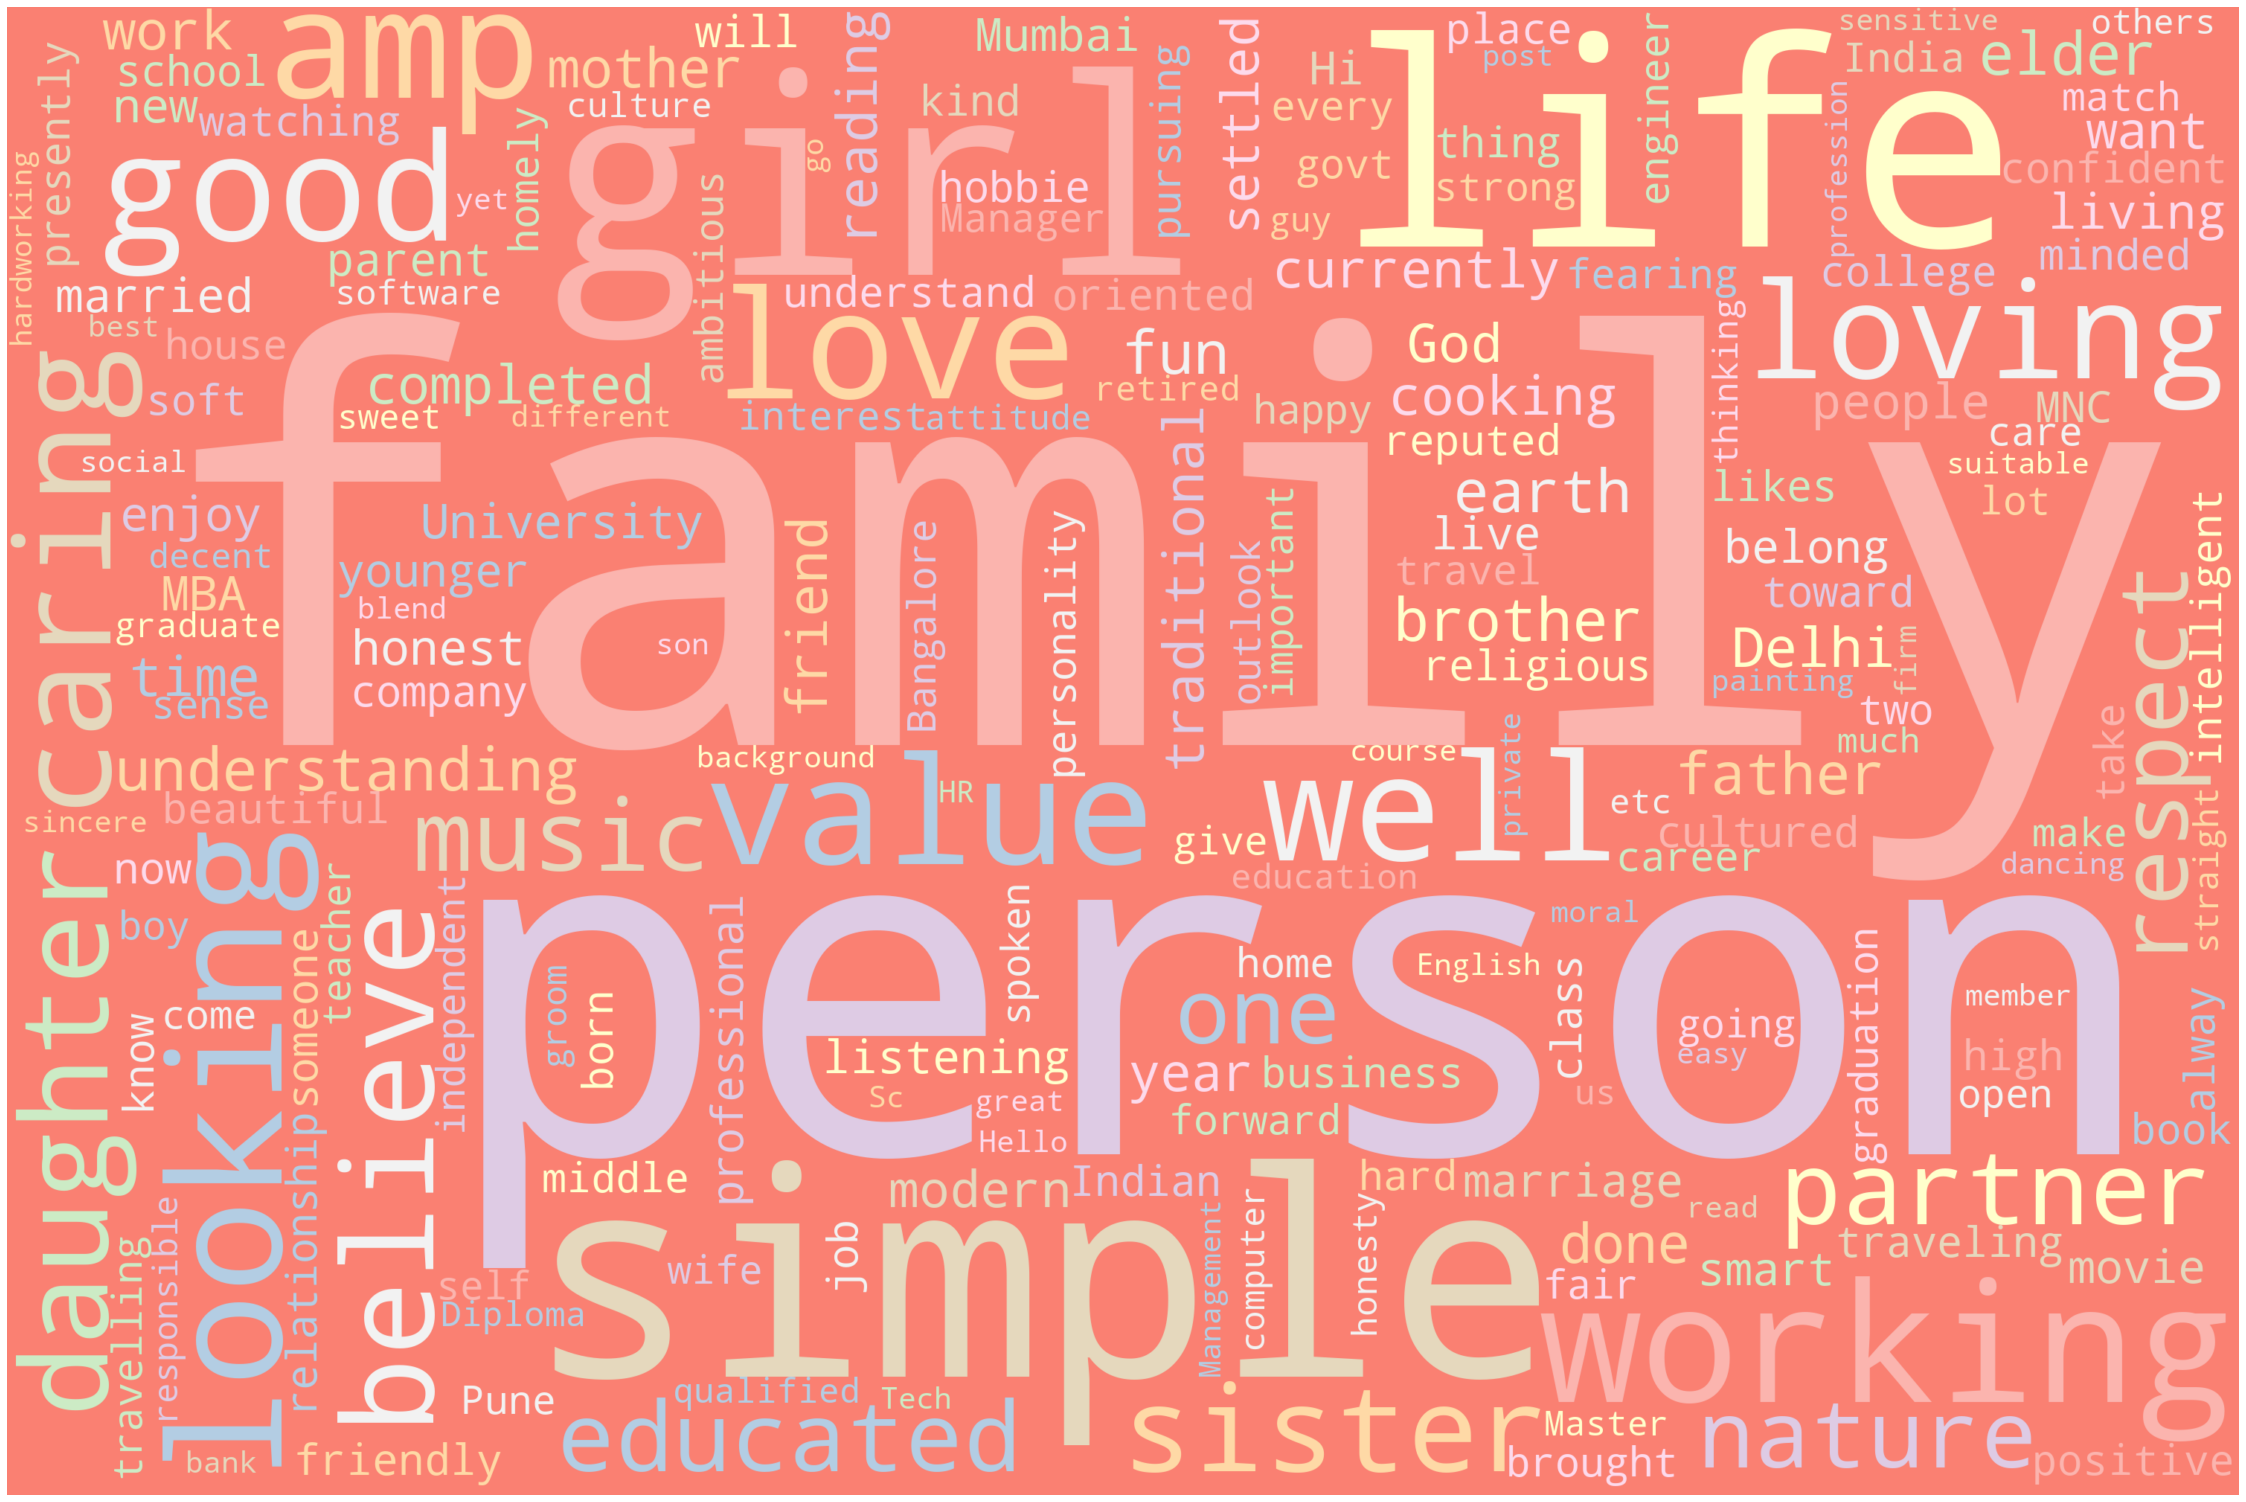

In [80]:
text = " ".join(review for review in df[df["type"] == "GroomWanted"].about1.dropna())
print ("There are {} words in the combination of all review.".format(len(text)))

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                      colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


There are 2888815 words in the combination of all review.


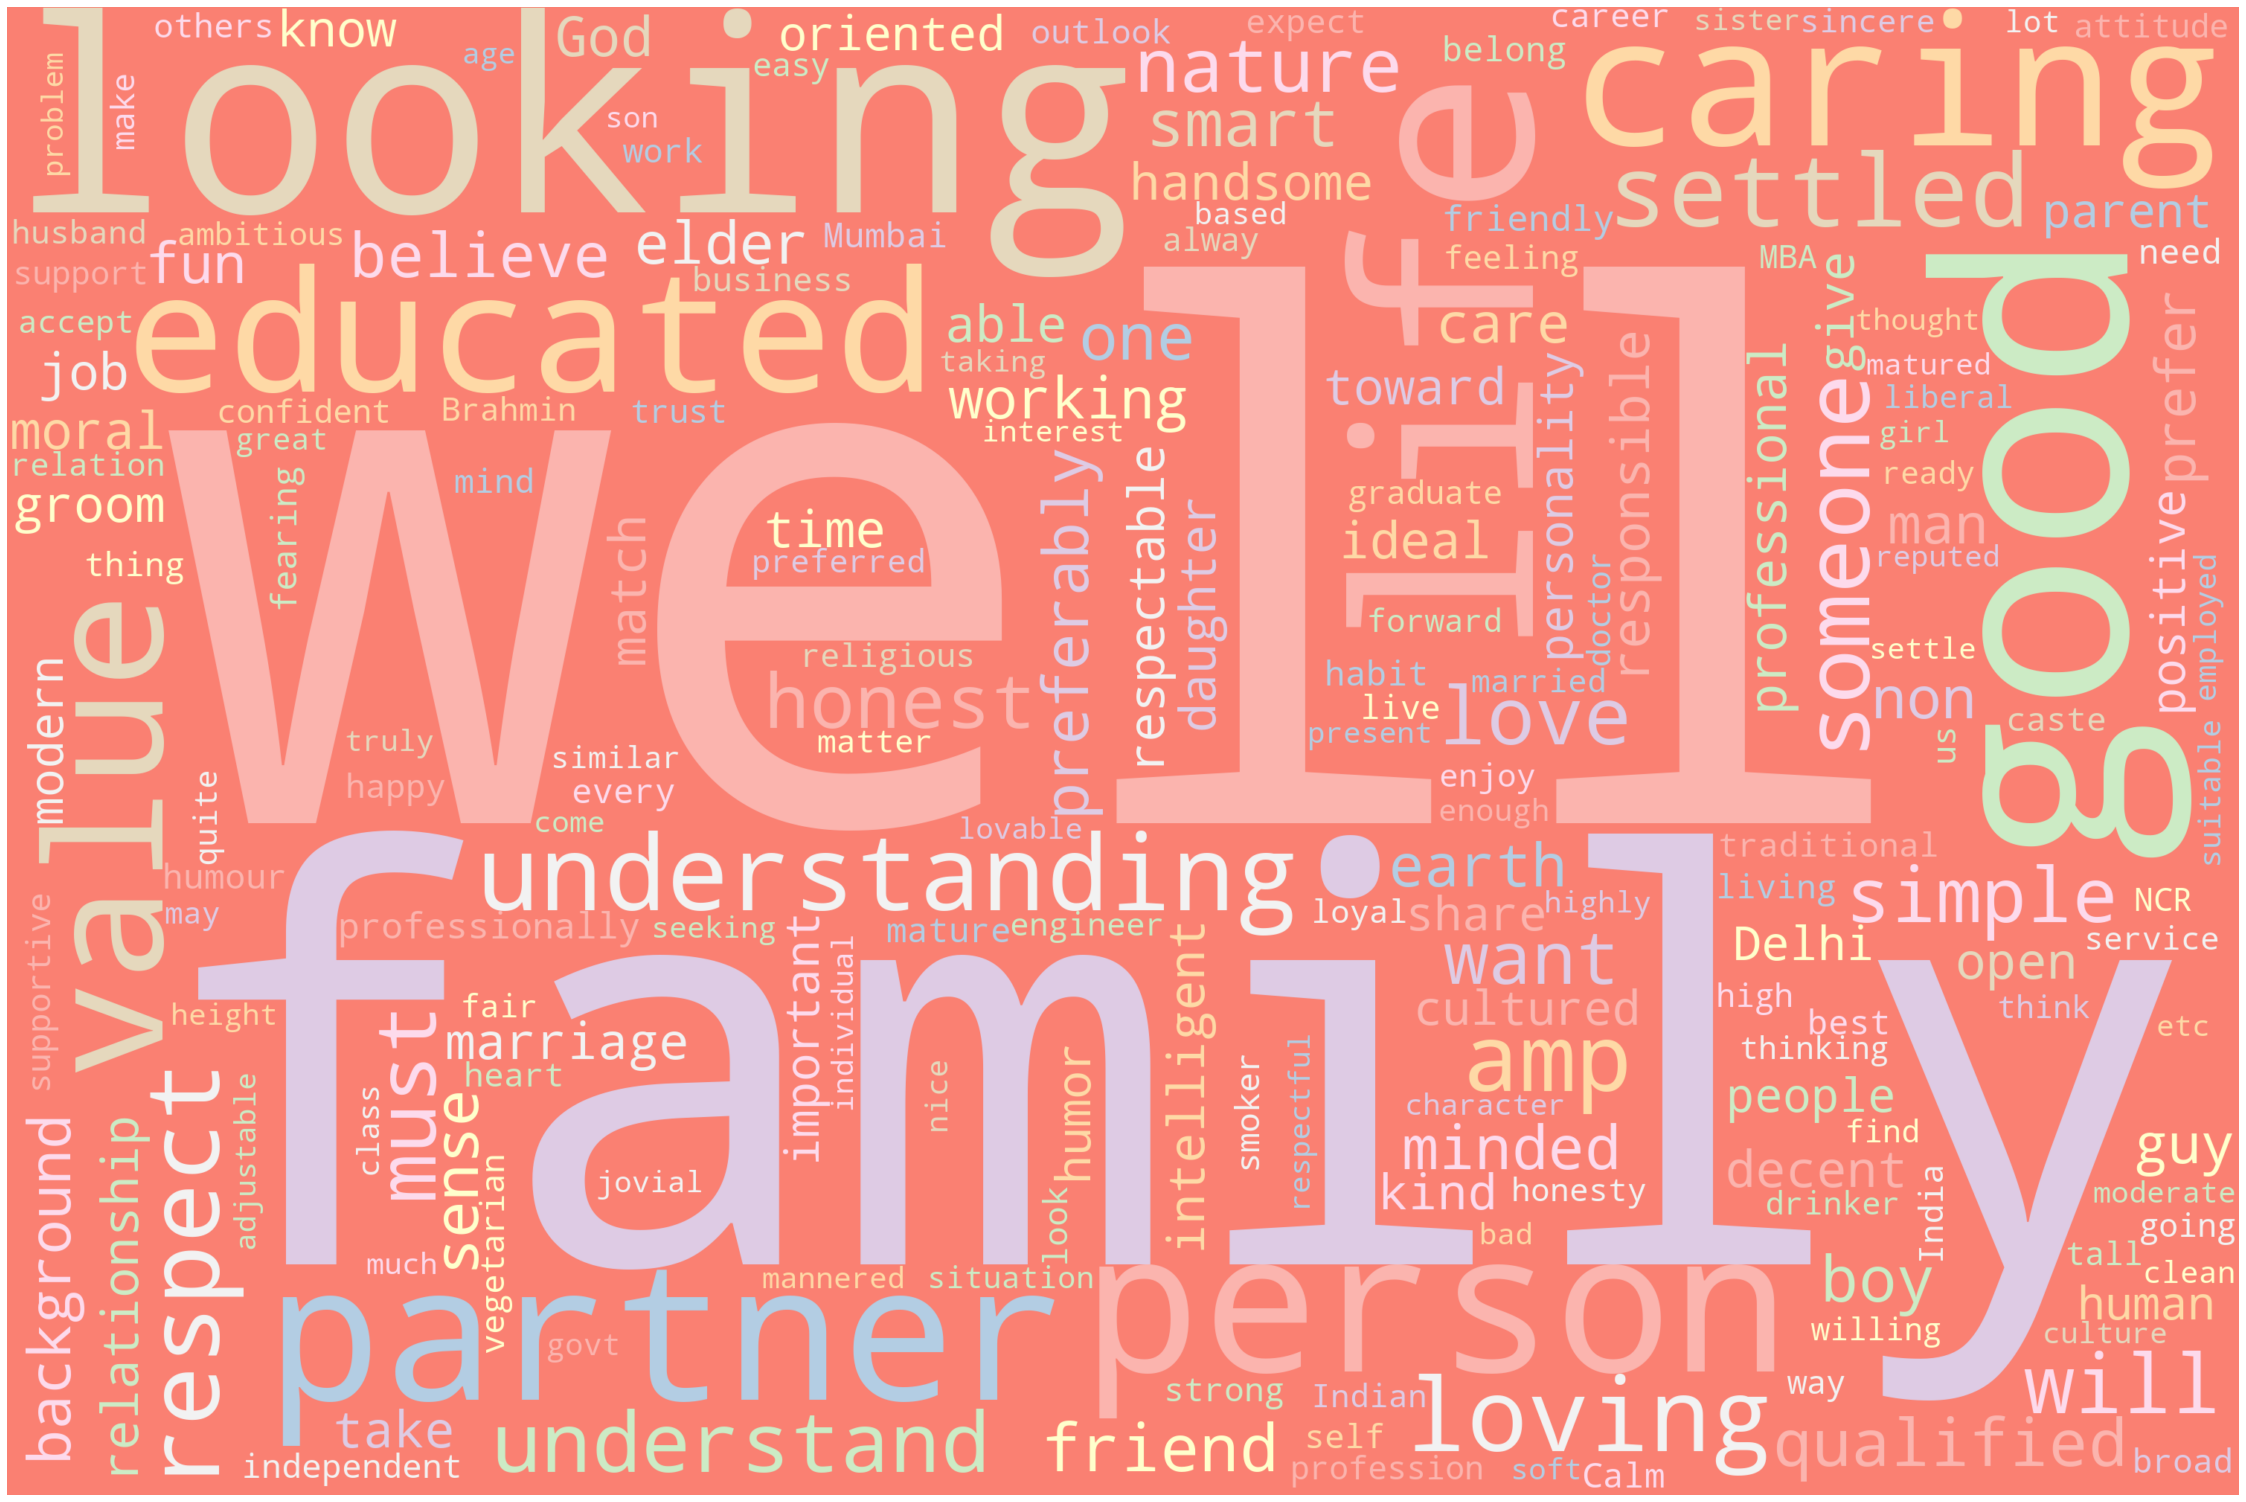

In [42]:
text = " ".join(review for review in df[df["type"] == "GroomWanted"].about2.dropna())
print ("There are {} words in the combination of all review.".format(len(text)))

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                      colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [202]:
#pip install rake_nltk

In [203]:
from  rake_nltk import Rake  

r = Rake(min_length=1)    

df1 = pd.DataFrame(df[(df["type"] == "GroomWanted") & (df["created_for"] == "Self")].about1.dropna())
#df1 = pd.DataFrame(df1[df1["created_for"] == "Daughter"])

def rake_implement(x,r):
     r.extract_keywords_from_text(x)
     return r.get_ranked_phrases()

df1['GroomWanted_about1'] =df1['about1'].apply(lambda x: rake_implement(x,r))
print(df1['GroomWanted_about1'])

7      [lucky person, like living, world, usually, li...
9      [responsible life, love living, simple, samana...
11     [unique characteristics, write, traits, person...
16     [family oriented girl, every step, want, treat...
26     [middle class family n, fun loving person, col...
                             ...                        
327    [vices moderately acceptable, travelling place...
332    [watching movies, staying alone, like music, t...
338     [good someone, come true, make, looking, dreams]
358    [travel places, currently working, adjustable ...
683    [though cannot digest dishonesty, well settled...
Name: GroomWanted_about1, Length: 15048, dtype: object


There are 2918703 words in the combination of all review.


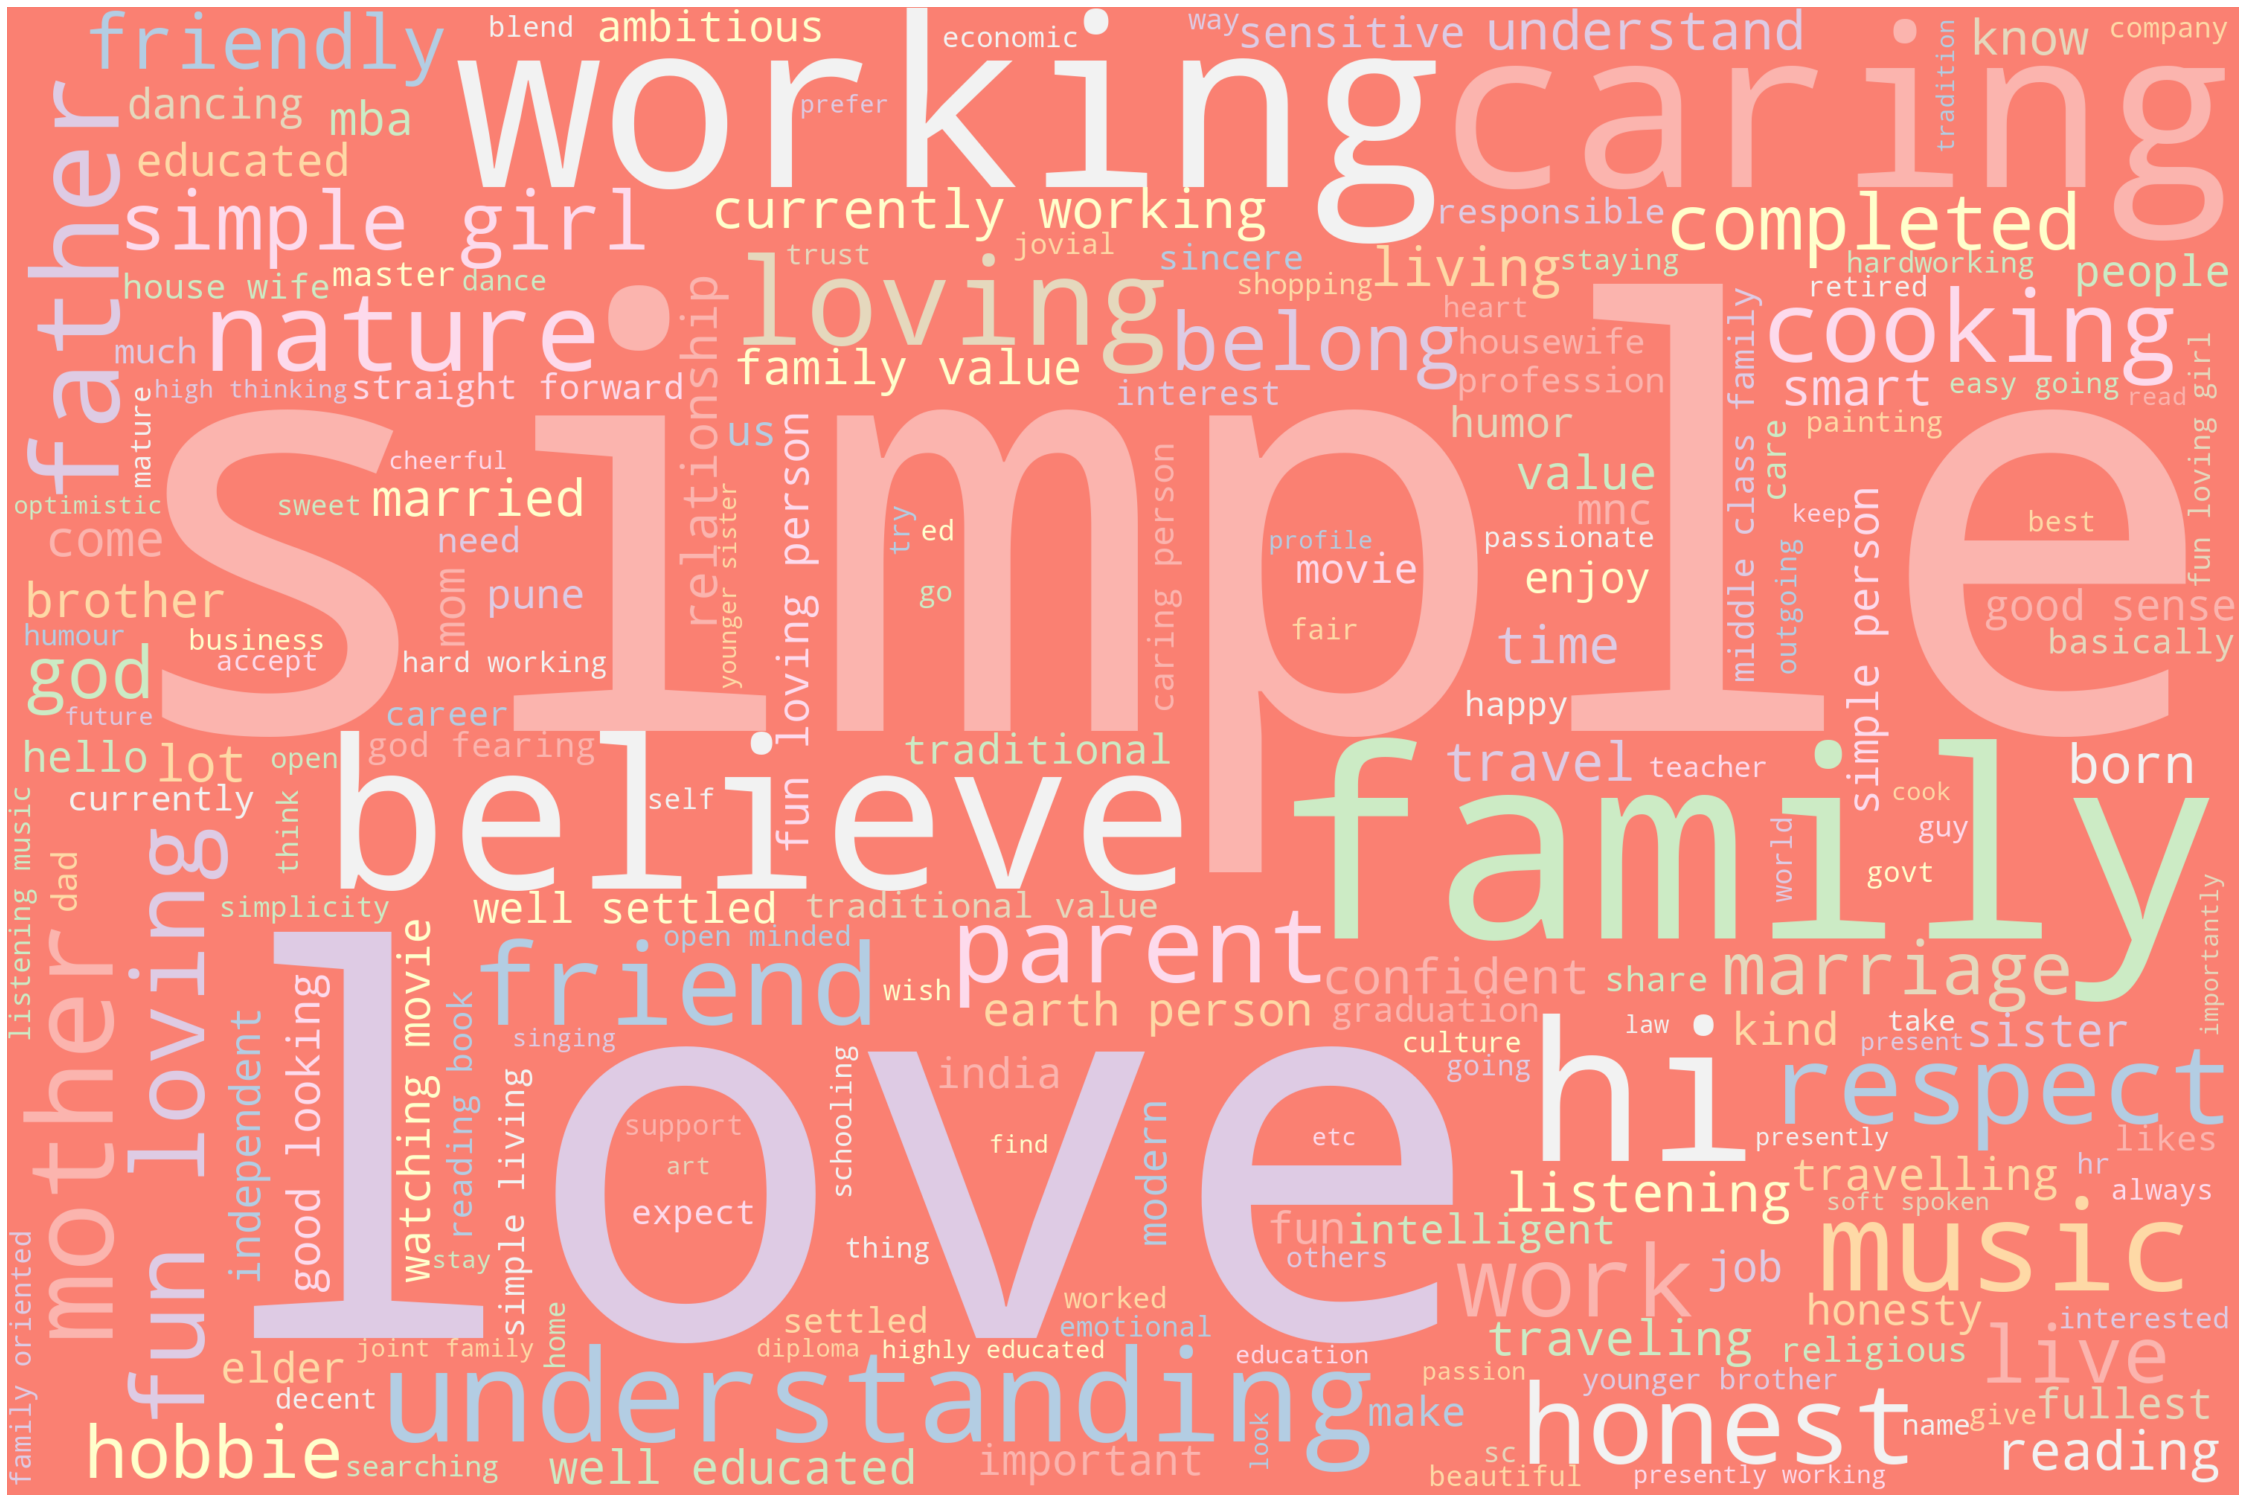

In [204]:
text = "+".join(review for review in df1['GroomWanted_about1'].apply('+'.join))
print ("There are {} words in the combination of all review.".format(len(text)))
stop_words = ["looking", "amp", "life", "partner", "must", "girl", "boy", "someone",
              "want", "well", "good", "earth", "life partner", "would like", "anything else", ",",
              "ideal partner", "son", "daughter", "b","delhi", "done", 'brought','willing', 'able', 'person',
             'mumbai','bangalore','believes','person','one'] + list(STOPWORDS)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                      colormap='Pastel1', collocations=False, stopwords = stop_words, regexp=r"\w[\w' ]+").generate(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [205]:
filtered_words_spam = [word for word in text.split('+') if word not in stop_words]
counted_words_spam = collections.Counter(filtered_words_spam)

word_count_spam = {}

for letter, count in counted_words_spam.most_common(30):
    word_count_spam[letter] = count
    
for i,j in word_count_spam.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: simple, count: 3117
Word: family, count: 2514
Word: working, count: 2471
Word: caring, count: 2194
Word: love, count: 2147
Word: believe, count: 1918
Word: hi, count: 1661
Word: understanding, count: 1416
Word: music, count: 1342
Word: loving, count: 1261
Word: father, count: 1223
Word: mother, count: 1167
Word: honest, count: 1052
Word: nature, count: 1042
Word: respect, count: 939
Word: parents, count: 919
Word: friends, count: 879
Word: fun loving, count: 864
Word: cooking, count: 850
Word: simple girl, count: 841
Word: work, count: 799
Word: completed, count: 767
Word: friendly, count: 725
Word: live, count: 707
Word: marriage, count: 659
Word: hobbies, count: 657
Word: god, count: 656
Word: currently working, count: 648
Word: reading, count: 637
Word: living, count: 633


7      [well educated, soft nature, carrier oriented,...
30     [2 respect girls, well educated, trust worthy,...
121    [ideal partner, good looking, family values, w...
146                                                   []
160    [well versed personally, family oriented backg...
                             ...                        
521    [well settled, person, loving, looking, life, ...
545                 [man, love, forever, family, accept]
573    [simple man, good senses, good care, easy goin...
635    [well settled, warmness, understand, smart, pa...
647    [hindu telugu speaking kshatriya raju family, ...
Name: GroomWanted_about2, Length: 5480, dtype: object
There are 751565 words in the combination of all review.


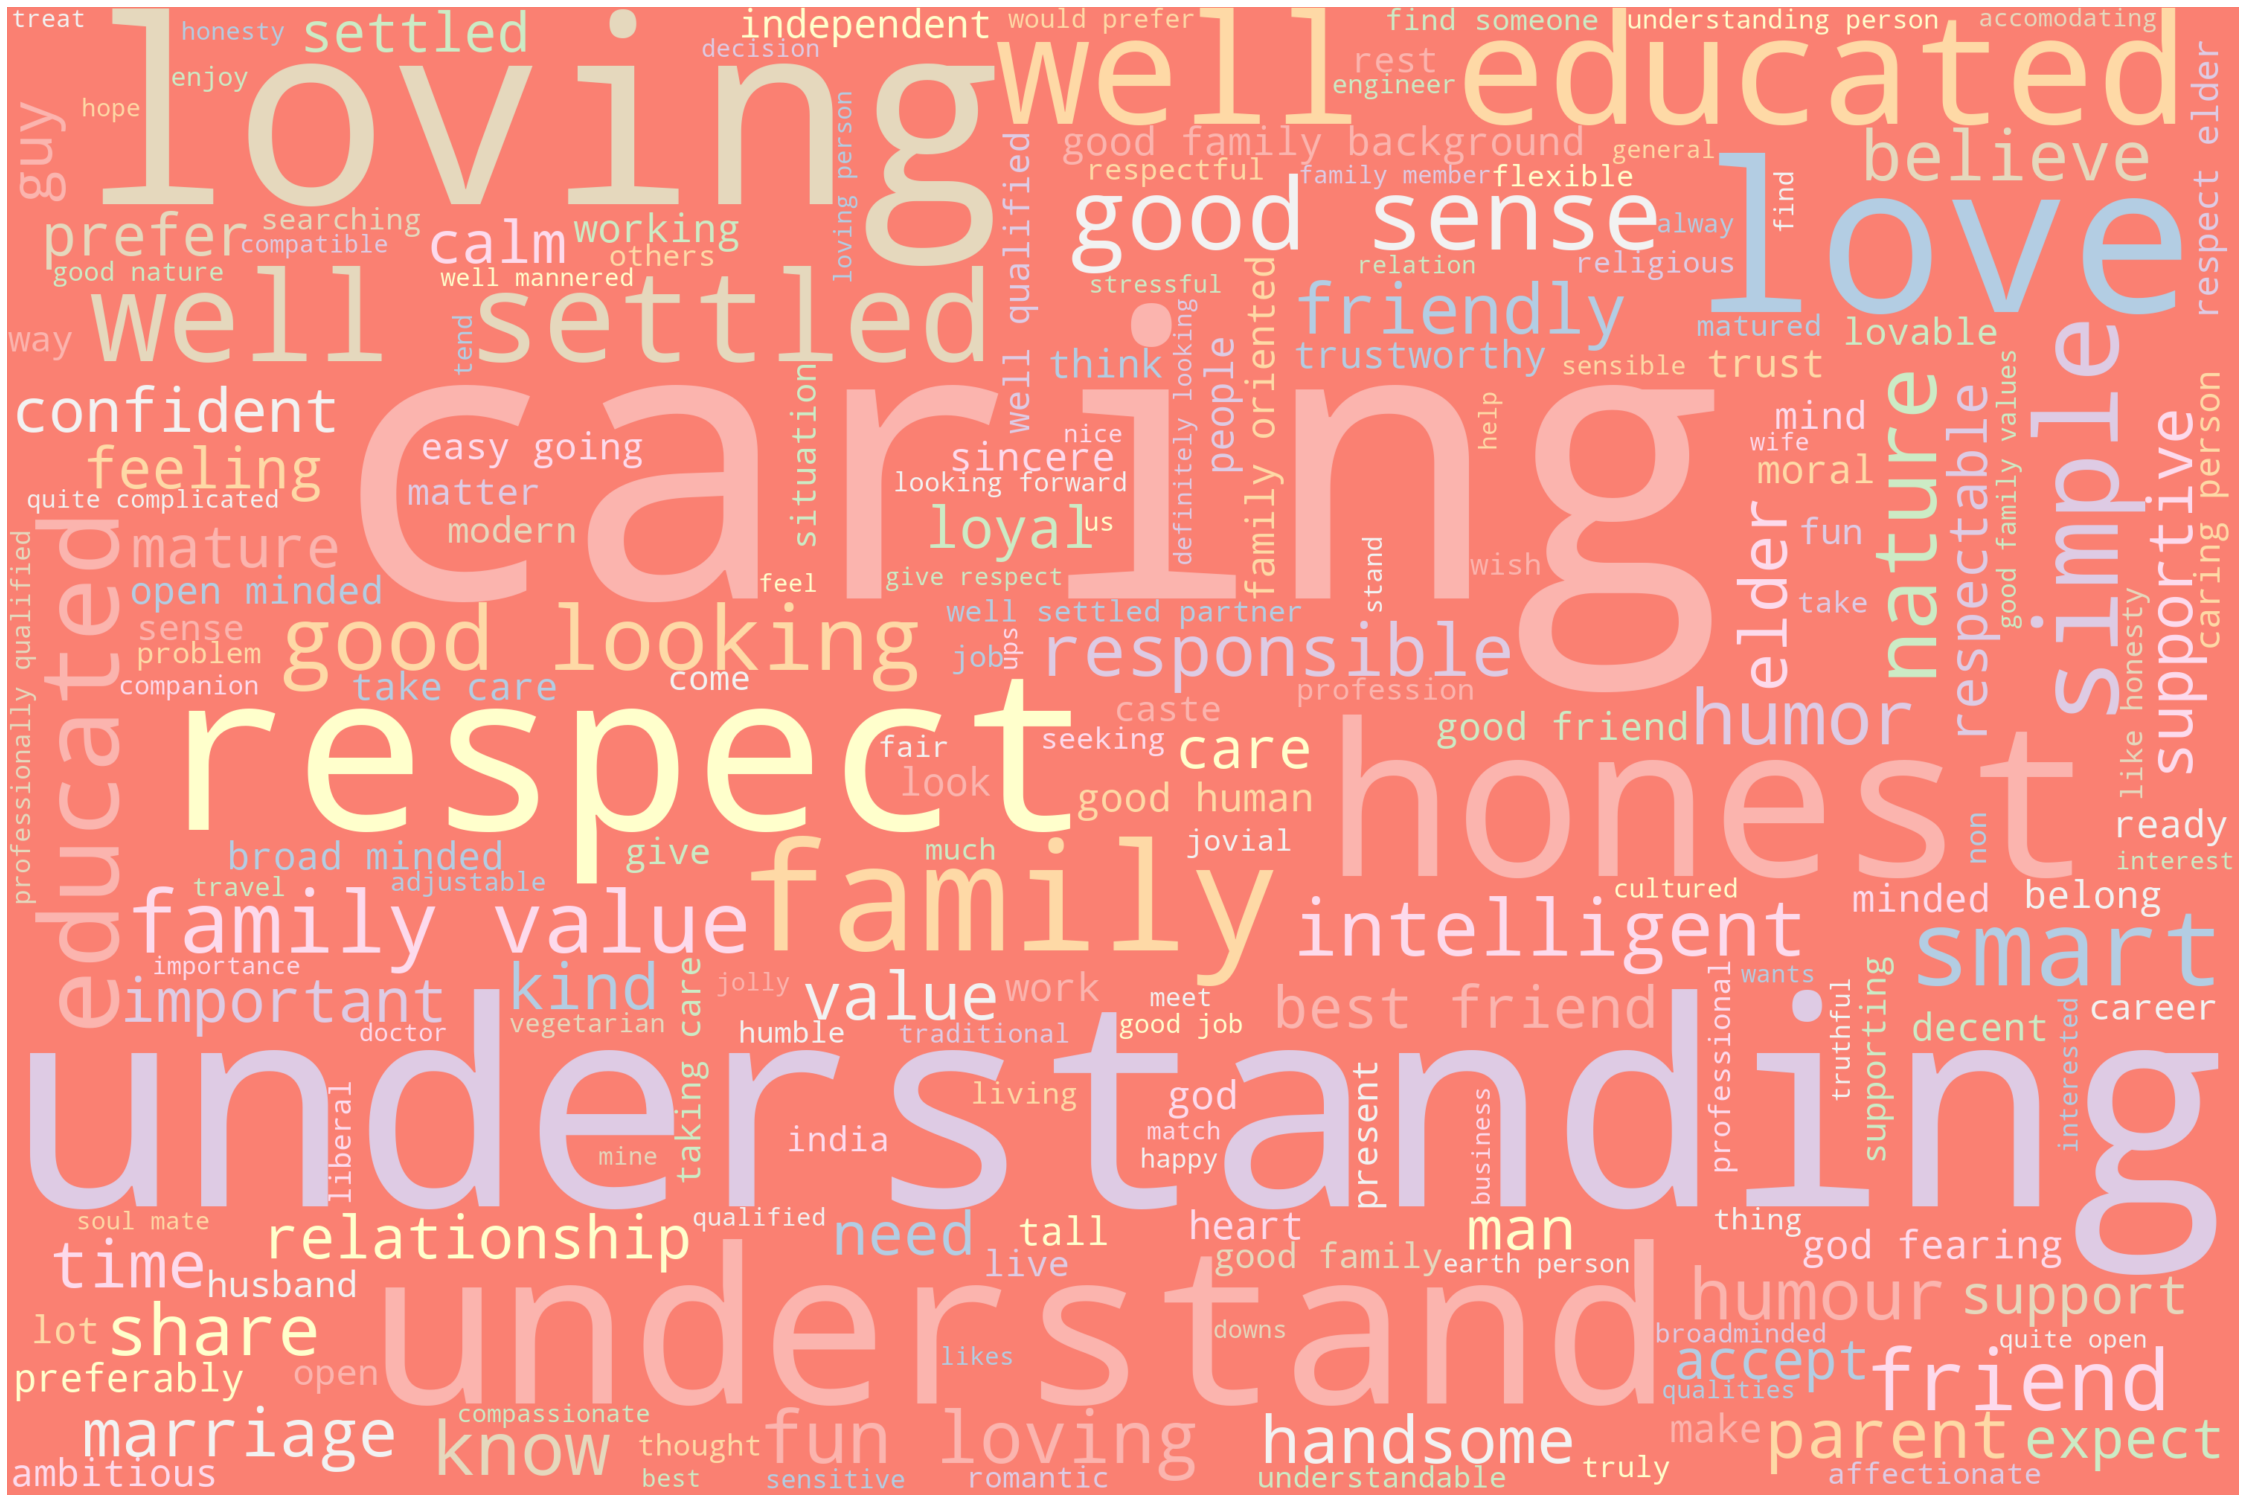

In [206]:
r = Rake(min_length=1)    

df1 = pd.DataFrame(df[(df["type"] == "GroomWanted") & (df["created_for"] == "Self")].about2.dropna())

def rake_implement(x,r):
     r.extract_keywords_from_text(x)
     return r.get_ranked_phrases()

df1['GroomWanted_about2'] =df1['about2'].apply(lambda x: rake_implement(x,r))
print(df1['GroomWanted_about2'])

text = "+".join(review for review in df1['GroomWanted_about2'].apply('+'.join))
print ("There are {} words in the combination of all review.".format(len(text)))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                      colormap='Pastel1', collocations=False, stopwords = stop_words, regexp=r"\w[\w' ]+").generate(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [207]:
filtered_words_spam = [word for word in text.split('+') if word not in stop_words]
counted_words_spam = collections.Counter(filtered_words_spam)

word_count_spam = {}

for letter, count in counted_words_spam.most_common(30):
    word_count_spam[letter] = count
    
for i,j in word_count_spam.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: caring, count: 1488
Word: understanding, count: 1172
Word: loving, count: 942
Word: honest, count: 625
Word: well educated, count: 596
Word: respect, count: 593
Word: family, count: 575
Word: well settled, count: 528
Word: love, count: 490
Word: understand, count: 452
Word: simple, count: 439
Word: educated, count: 402
Word: smart, count: 371
Word: good sense, count: 331
Word: good looking, count: 327
Word: nature, count: 326
Word: family values, count: 305
Word: intelligent, count: 249
Word: friend, count: 238
Word: humor, count: 237
Word: fun loving, count: 217
Word: responsible, count: 210
Word: humour, count: 206
Word: understands, count: 201
Word: friendly, count: 195
Word: believe, count: 193
Word: parents, count: 180
Word: share, count: 173
Word: handsome, count: 172
Word: marriage, count: 171


0       [kuhd k tarif karna nai pasannd h mujhe ...., ...
0       [pace setter bpo pvt ltd, 6th months experienc...
2       [visit new places, positive attitude, hate vio...
3       [ranjeet singh badyal, respect people, hi ...,...
0       [modern thinking boy, understand people, rv ),...
                              ...                        
3295    [retired govt employee, two sons, presently wo...
3337    [48 yrs .), 55 yrs, looks 45, good personality...
4513    [respect female rather, loves human beings, eq...
4519    [real estate consultant, stock broker, social ...
4522    [simple guy, giving back, willing, society, se...
Name: BrideWanted_about1, Length: 73208, dtype: object
There are 12768544 words in the combination of all review.


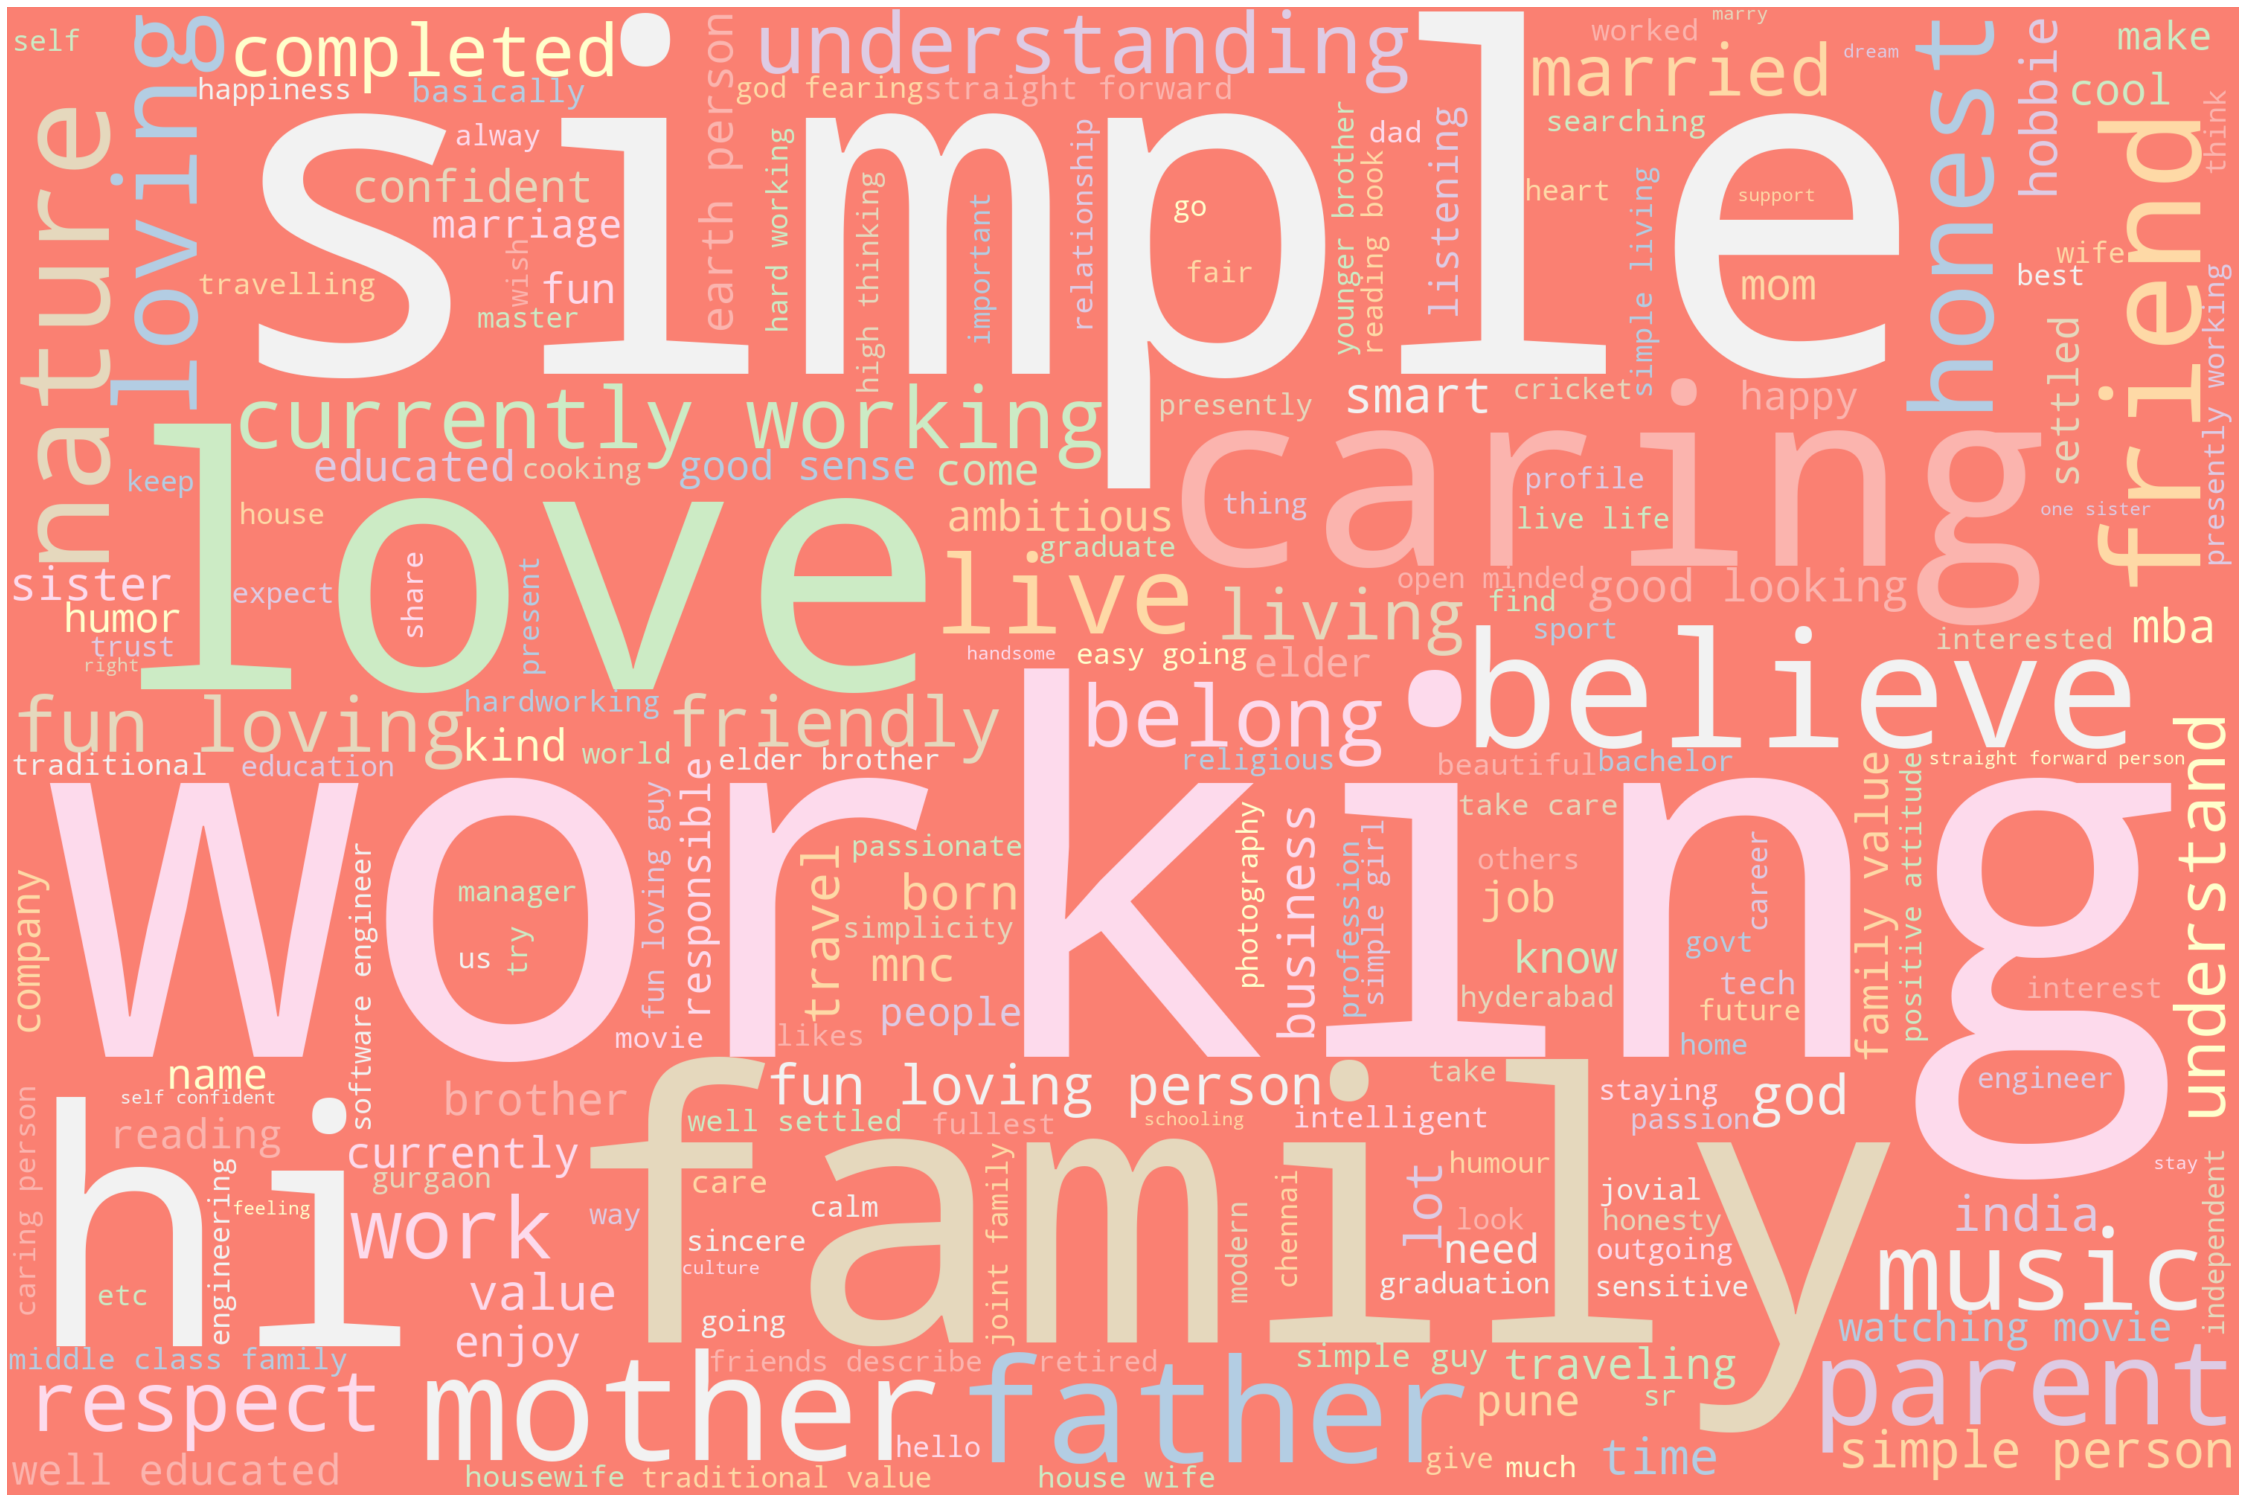

In [208]:
r = Rake(min_length=1)    

df1 = pd.DataFrame(df[(df["type"] == "BrideWanted") & (df["created_for"] == "Self")].about1.dropna())

def rake_implement(x,r):
     r.extract_keywords_from_text(x)
     return r.get_ranked_phrases()

df1['BrideWanted_about1'] =df1['about1'].apply(lambda x: rake_implement(x,r))
print(df1['BrideWanted_about1'])

text = "+".join(review for review in df1['BrideWanted_about1'].apply('+'.join))
print ("There are {} words in the combination of all review.".format(len(text)))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                      colormap='Pastel1', collocations=False, stopwords = stop_words, regexp=r"\w[\w' ]+").generate(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [209]:
filtered_words_spam = [word for word in text.split('+') if word not in stop_words]
counted_words_spam = collections.Counter(filtered_words_spam)

word_count_spam = {}

for letter, count in counted_words_spam.most_common(30):
    word_count_spam[letter] = count
    
for i,j in word_count_spam.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: working, count: 14746
Word: simple, count: 12837
Word: family, count: 11144
Word: hi, count: 8538
Word: love, count: 8304
Word: caring, count: 7611
Word: believe, count: 6771
Word: mother, count: 5522
Word: father, count: 5397
Word: nature, count: 4446
Word: parents, count: 4238
Word: honest, count: 4010
Word: loving, count: 4008
Word: music, count: 3764
Word: friends, count: 3603
Word: currently working, count: 3572
Word: understanding, count: 3462
Word: fun loving, count: 3448
Word: respect, count: 3315
Word: work, count: 3269
Word: live, count: 3232
Word: completed, count: 3198
Word: married, count: 3149
Word: friendly, count: 2999
Word: living, count: 2897
Word: fun loving person, count: 2563
Word: god, count: 2544
Word: understand, count: 2484
Word: simple person, count: 2452
Word: hobbies, count: 2364


2       [must give priority, well settled, simple girl...
3       [traditional values, perfect blend, modern cul...
54      [jolly type life partner, caring understanding...
10      [treat different people, stable personality, s...
18      [free going, social, modern, life, liberal, ki...
                              ...                        
4450    [indipendent life good looking faire, friendly...
4453    [indial bridal cloths, arrange 2nd marriage, p...
4455    [enjoy simple things, simple person, loving wo...
4479    [every one positive minded convenient, kind he...
4489    [modren islamic, truelover, honesst, god, bele...
Name: BrideWanted_about2, Length: 22839, dtype: object
There are 2869761 words in the combination of all review.


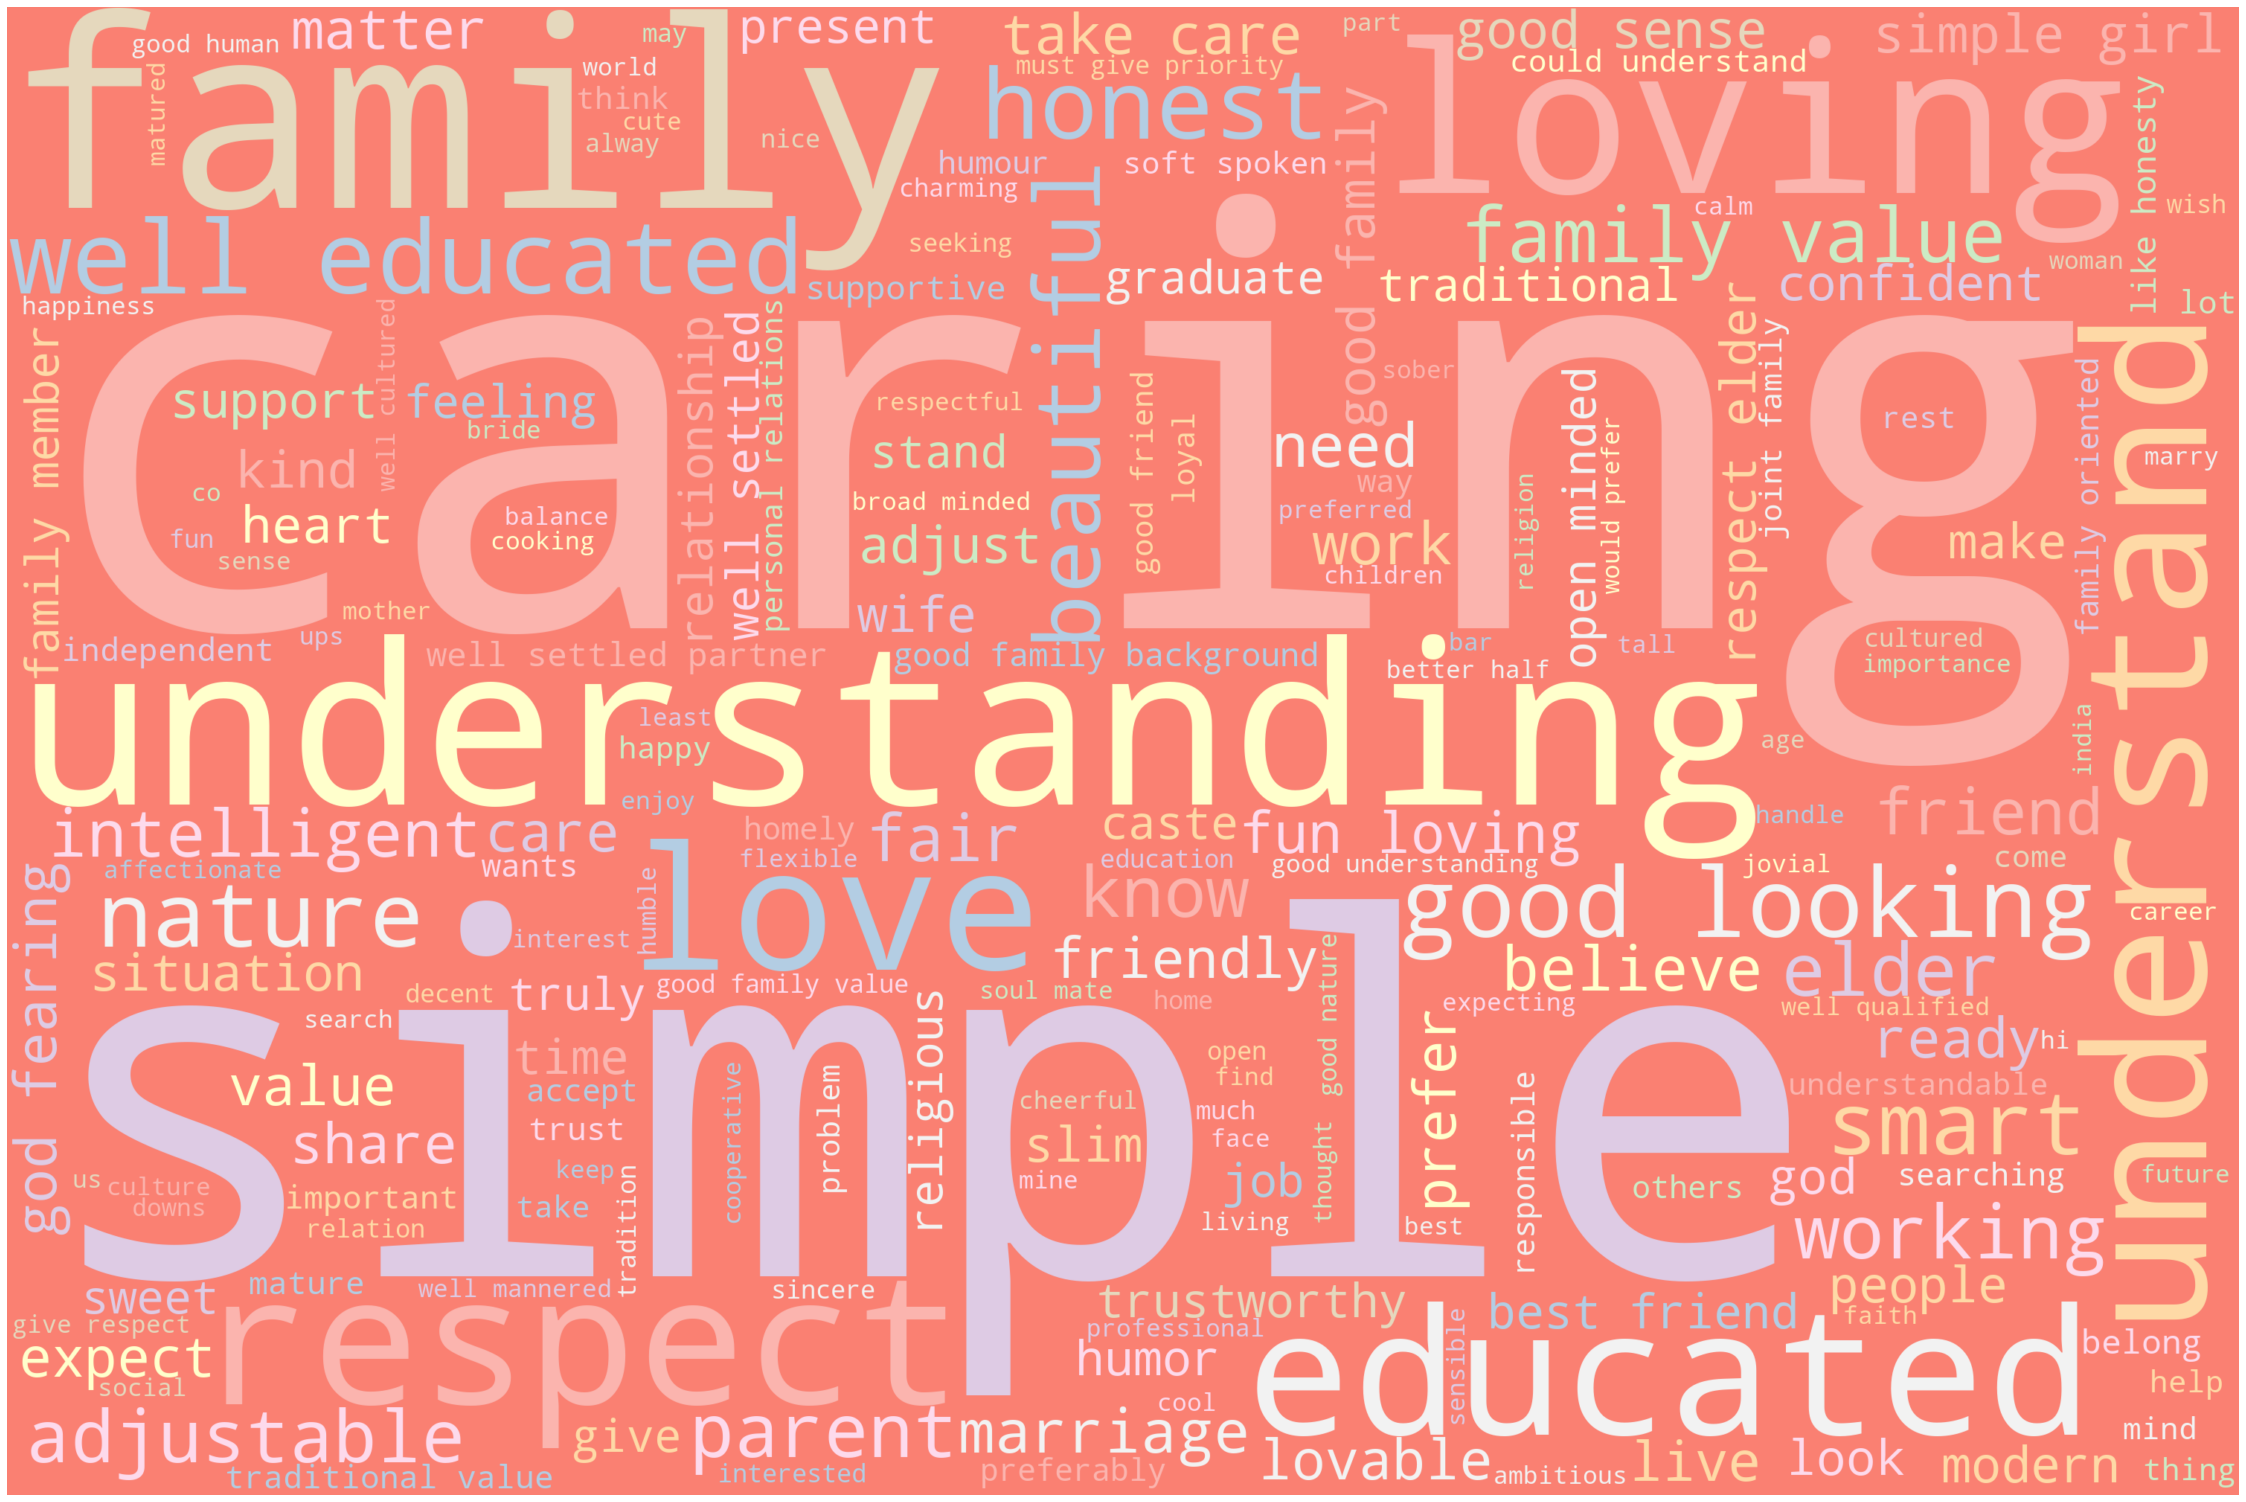

In [210]:
r = Rake(min_length=1)    

df1 = pd.DataFrame(df[(df["type"] == "BrideWanted") & (df["created_for"] == "Self")].about2.dropna())

def rake_implement(x,r):
     r.extract_keywords_from_text(x)
     return r.get_ranked_phrases()

df1['BrideWanted_about2'] =df1['about2'].apply(lambda x: rake_implement(x,r))
print(df1['BrideWanted_about2'])

text = "+".join(review for review in df1['BrideWanted_about2'].apply('+'.join))
print ("There are {} words in the combination of all review.".format(len(text)))

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                      colormap='Pastel1', collocations=False, stopwords = stop_words, regexp=r"\w[\w' ]+").generate(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [211]:
filtered_words_spam = [word for word in text.split('+') if word not in stop_words]
counted_words_spam = collections.Counter(filtered_words_spam)

word_count_spam = {}

for letter, count in counted_words_spam.most_common(30):
    word_count_spam[letter] = count
    
for i,j in word_count_spam.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: caring, count: 4493
Word: simple, count: 3279
Word: family, count: 3270
Word: understanding, count: 2761
Word: loving, count: 2378
Word: educated, count: 2083
Word: respect, count: 2034
Word: well educated, count: 1920
Word: good looking, count: 1712
Word: honest, count: 1705
Word: love, count: 1705
Word: understand, count: 1618
Word: nature, count: 1510
Word: beautiful, count: 1506
Word: smart, count: 1385
Word: working, count: 1016
Word: family values, count: 999
Word: parents, count: 989
Word: adjustable, count: 975
Word: elders, count: 935
Word: intelligent, count: 880
Word: fair, count: 844
Word: believe, count: 788
Word: marriage, count: 756
Word: work, count: 711
Word: god fearing, count: 697
Word: friend, count: 681
Word: fun loving, count: 668
Word: lovable, count: 658
Word: take care, count: 649


In [212]:
df['created_for'].value_counts()

Self        214925
Son          25785
Daughter     23675
Brother      17868
Friend       17733
Sister       14749
Relative      5362
Name: created_for, dtype: int64

In [213]:
df1

about2  \
2     Must be God fearing, lovable, trustworthy, car...   
3     I am  looking a looking girl who is perfect bl...   
54    I m looking a  simple, caring understanding ca...   
10    She must have the attributes of a good friend ...   
18    Kind, beautiful, friendly, social, liberal and...   
...                                                 ...   
4450  i like my life partner to be honest and friend...   
4453  i am going to arrange 2nd marriage, she should...   
4455  I am looking for warm and loving woman , enjoy...   
4479  She should be good looking need not be handsom...   
4489  truelover,honesst,beleaving in god,modren islamic   

                                     BrideWanted_about2  
2     [must give priority, well settled, simple girl...  
3     [traditional values, perfect blend, modern cul...  
54    [jolly type life partner, caring understanding...  
10    [treat different people, stable personality, s...  
18    [free going, social, modern, life, liberal, ki...  
...                                                 ...  
4450  [indipendent life good looking faire, friendly...  
4453  [indial bridal cloths, arrange 2nd marriage, p...  
4455  [enjoy simple things, simple person, loving wo...  
4479  [every one positive minded convenient, kind he...  
4489  [modren islamic, truelover, honesst, god, bele...  

[22839 rows x 2 columns]

In [214]:
df

about1  \
0     My self Priyanka, pursuing B.Com 2nd year and ...   
1                Am smart, modern and independent girl.   
2     I am an understanding person with a positive d...   
3     I am an easy going girl and presently studying...   
4     She is simple, straight forward and down to ea...   
...                                                 ...   
4521                                                NaN   
4522  I am a simple guy who believes in giving back ...   
4523                                                NaN   
4524                                                NaN   
4525                                                NaN   

                                                 about2 about_family  \
0                                                   NaN          NaN   
1                                                   NaN          NaN   
2                                                   NaN          NaN   
3                                                   NaN          NaN   
4     He should be simple and respect women. He shou...          NaN   
...                                                 ...          ...   
4521                                                NaN          NaN   
4522                                                NaN          NaN   
4523                                                NaN          NaN   
4524                                                NaN          NaN   
4525                                                NaN          NaN   

          age2       birth1    birth2                birth3     birth4  \
0     21 to 24  26 May 1995  04:00:00                 India     Meerut   
1     21 to 25  15 Jun 1995       NaN                   NaN        NaN   
2     21 to 24  14 Nov 1994       NaN  United Arab Emirates        NaN   
3     21 to 30  12 Dec 1994       NaN                 India      Delhi   
4     27 to 32  27 Jul 1995       NaN                   NaN        NaN   
...        ...          ...       ...                   ...        ...   
4521  18 to 28  27 Mar 1961       NaN                   NaN        NaN   
4522  38 to 48  05 Apr 1962       NaN                   NaN        NaN   
4523  18 to 21  19 Mar 1947  00:07:00                 India  Allahabad   
4524  55 to 60  05 Jan 1953       NaN                   NaN        NaN   
4525  35 to 45  12 Apr 1956       NaN                   NaN        NaN   

        body1 body2  ... special2       status1     status2  \
0        Slim   NaN  ...      NaN  Middle Class         NaN   
1     Average   NaN  ...      NaN           NaN         NaN   
2     Average  Slim  ...     None  Middle Class  High Class   
3        Slim   NaN  ...      NaN  Middle Class         NaN   
4       Heavy   NaN  ...      NaN           NaN         NaN   
...       ...   ...  ...      ...           ...         ...   
4521  Average   NaN  ...      NaN           NaN         NaN   
4522  Average   NaN  ...      NaN           NaN         NaN   
4523     Slim   NaN  ...      NaN           NaN         NaN   
4524     Slim   NaN  ...      NaN           NaN         NaN   
4525  Average   NaN  ...      NaN  Middle Class         NaN   

                subcaste url   values1 values2 weight1         weight2  \
0                Tevatia NaN  Moderate     NaN     NaN             NaN   
1                    NaN NaN       NaN     NaN     NaN             NaN   
2                    NaN NaN    Modern  Modern  55 Kgs  49 to 50 [Kgs]   
3                    NaN NaN   Liberal     NaN     NaN             NaN   
4                    NaN NaN       NaN     NaN     NaN             NaN   
...                  ...  ..       ...     ...     ...             ...   
4521  Christian - Others NaN       NaN     NaN     NaN             NaN   
4522  Christian - Others NaN       NaN     NaN     NaN             NaN   
4523                 NaN NaN       NaN     NaN     NaN             NaN   
4524             Ahirwar NaN       NaN     NaN     NaN             NaN   
4525           

In [215]:
df.to_csv('cleaned.csv', encoding='utf-8', index=False)

In [288]:
from io import StringIO
col = ['type', 'about2']
df = df[col]
df = df[pd.notnull(df['about2'])]
df = df[pd.notnull(df['type'])]
df.columns = ['type', 'about2']
df['category_id'] = df['type'].factorize()[0]
df['about2'] = df['about2'].astype(str)
df.head()

type                                             about2  \
7   GroomWanted  Must be understanding, caring, loving, carrier...   
30  GroomWanted  Want a smart and handsome guy who know how 2 r...   
31  GroomWanted  Must be good looking, understanding, caring, l...   
44  GroomWanted  I m looking for a simple, caring, understandin...   
45  GroomWanted  We are open to educated South Indian Families ...   

    category_id  
7             0  
30            0  
31            0  
44            0  
45            0

In [307]:
df.head()

type                                             about2  \
7   GroomWanted  Must be understanding, caring, loving, carrier...   
30  GroomWanted  Want a smart and handsome guy who know how 2 r...   
31  GroomWanted  Must be good looking, understanding, caring, l...   
44  GroomWanted  I m looking for a simple, caring, understandin...   
45  GroomWanted  We are open to educated South Indian Families ...   

    category_id  
7             0  
30            0  
31            0  
44            0  
45            0

In [290]:
pd.crosstab(df.type, df.category_id)

category_id      0      1
type                     
BrideWanted      0  32216
GroomWanted  13806      0

In [291]:
category_id_df = df[['type', 'about2']].drop_duplicates().sort_values('type')

In [292]:
category_to_id = dict(category_id_df.values)

In [301]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=0.01, norm='l2', encoding='latin-1', ngram_range=(1, 2),
                        max_features = 10000, stop_words='english')
features = tfidf.fit_transform(df.about2.astype(str)).toarray()
labels = df.category_id
features.shape

(46022, 341)

In [302]:
from sklearn.feature_selection import chi2
import numpy as np

N = 20
for type, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(type))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

C:\Users\suvad\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\suvad\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


# 'BrideWanted':
  . Most correlated unigrams:
       . flexible
       . highly
       . high
       . help
       . height
       . hearted
       . heart
       . having
       . home
       . happy
       . handsome
       . handle
       . habits
       . guy
       . groom
       . great
       . graduate
       . govt
       . happiness
       . world
  . Most correlated bigrams:
       . broad minded
       . ideal partner
       . honesty prefers
       . honest present
       . joint family
       . looking educated
       . like honesty
       . life partner
       . looking good
       . good human
       . good friend
       . good family
       . god fearing
       . girl good
       . fun loving
       . good looking
       . good nature
       . good sense
       . good understanding
       . having good
# 'GroomWanted':
  . Most correlated unigrams:
       . flexible
       . highly
       . high
       . help
       . height
       . hearted
       . heart
       . ha

In [303]:
feature_names

array(['able', 'person', 'perfect', 'people honest', 'people',
       'partner understand', 'partner simple', 'partner like',
       'partner good', 'partner educated', 'partner', 'parents',
       'outlook', 'oriented', 'open minded', 'open', 'non', 'nice',
       'person good', 'new', 'personal', 'positive', 'qualified',
       'professionally qualified', 'professionally', 'professional',
       'profession', 'problem', 'priority', 'present truly', 'present',
       'prefers people', 'prefers', 'preferred', 'preference',
       'preferably', 'prefer', 'post', 'positive attitude', 'personality',
       'need', 'ncr', 'natured', 'married', 'marriage', 'mannered', 'man',
       'make', 'loyal', 'loving caring', 'loving', 'loves', 'love',
       'lovable', 'lot', 'looks', 'looking smart', 'looking simple',
       'looking settled', 'looking person', 'match', 'mate', 'matter',
       'mature', 'nature', 'mutual', 'music', 'mumbai', 'mother',
       'moral values', 'moral', 'modern', 'qual